In [6]:
import pandas as pd
from sklearn.cluster import KMeans, MeanShift, Birch
import matplotlib.pyplot as plt

In [7]:
# Load your dataset
data = pd.read_csv('G:/My Drive/Course work Fall 2023/Data Science/Project/COVID19_Influence_on_Mobility_Patterns_Group2_Fall2023/data/preprocessed_data_1.csv')

c:\Users\Shrey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


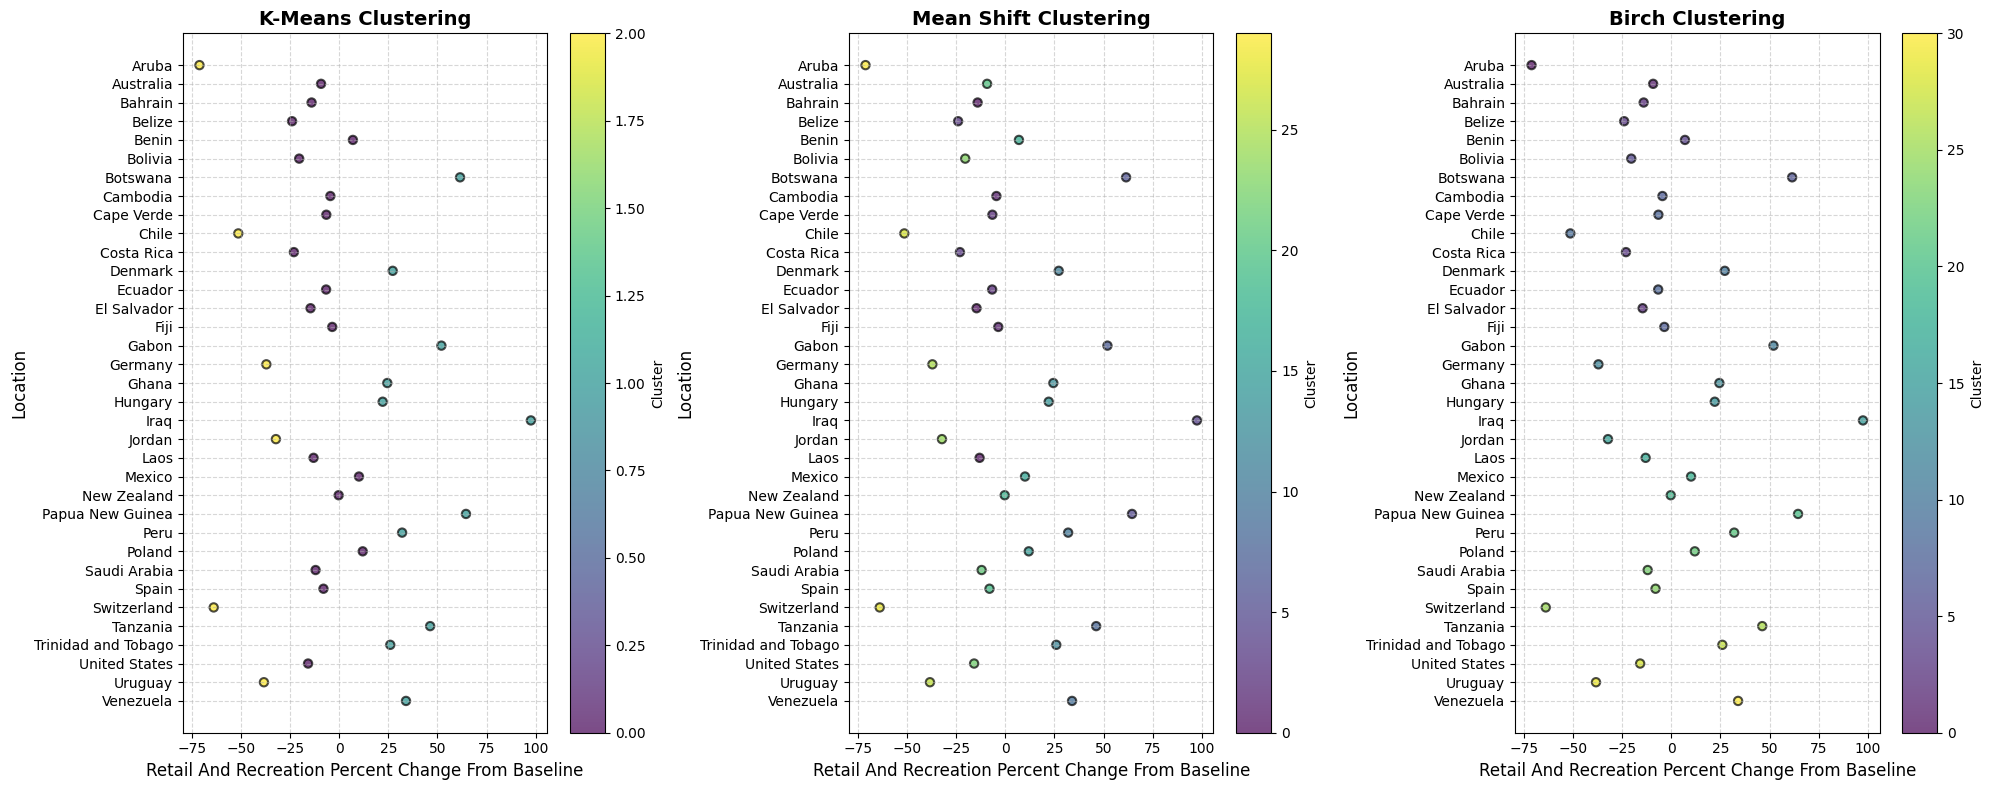

c:\Users\Shrey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


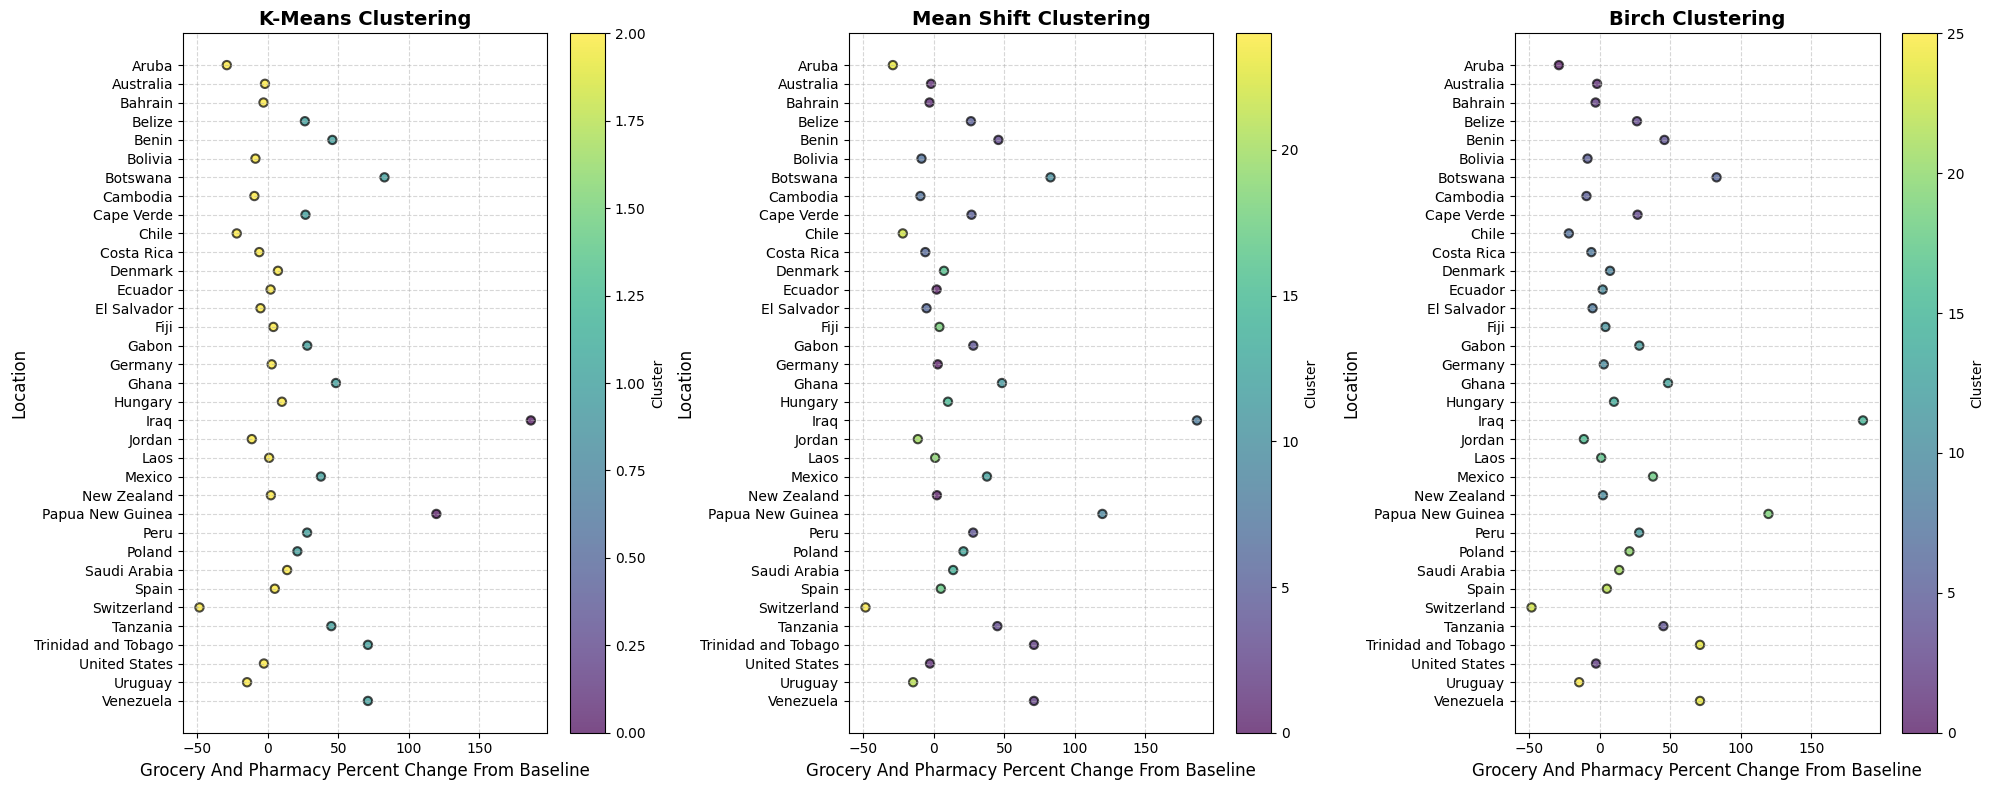

c:\Users\Shrey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


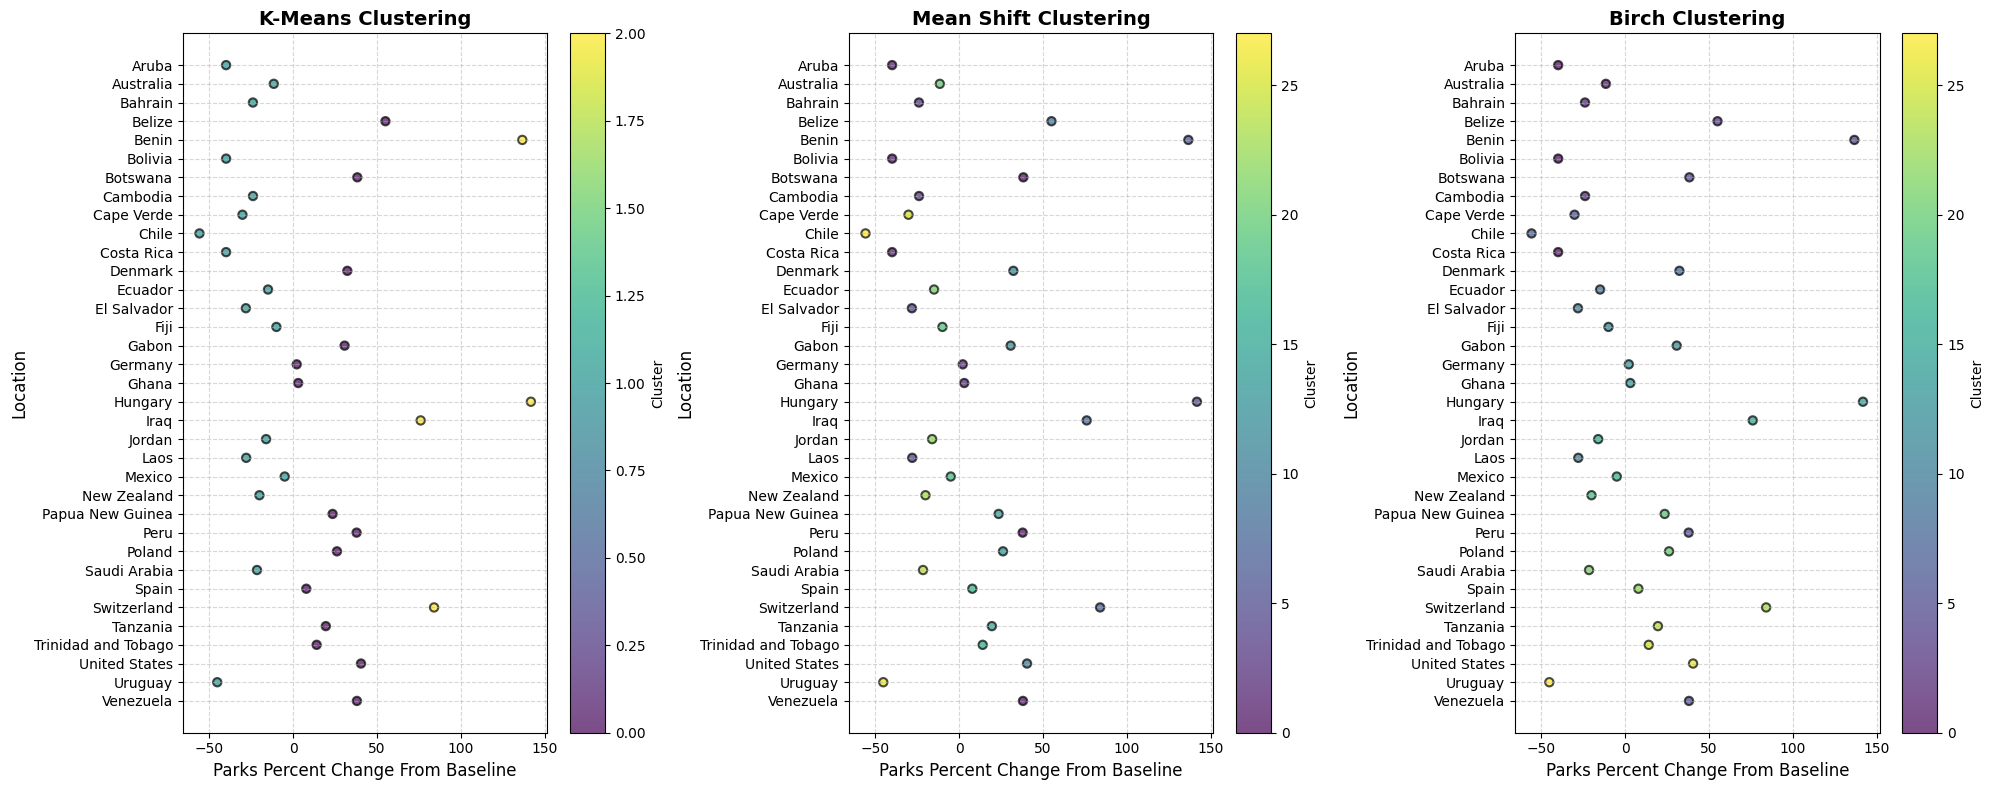

c:\Users\Shrey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


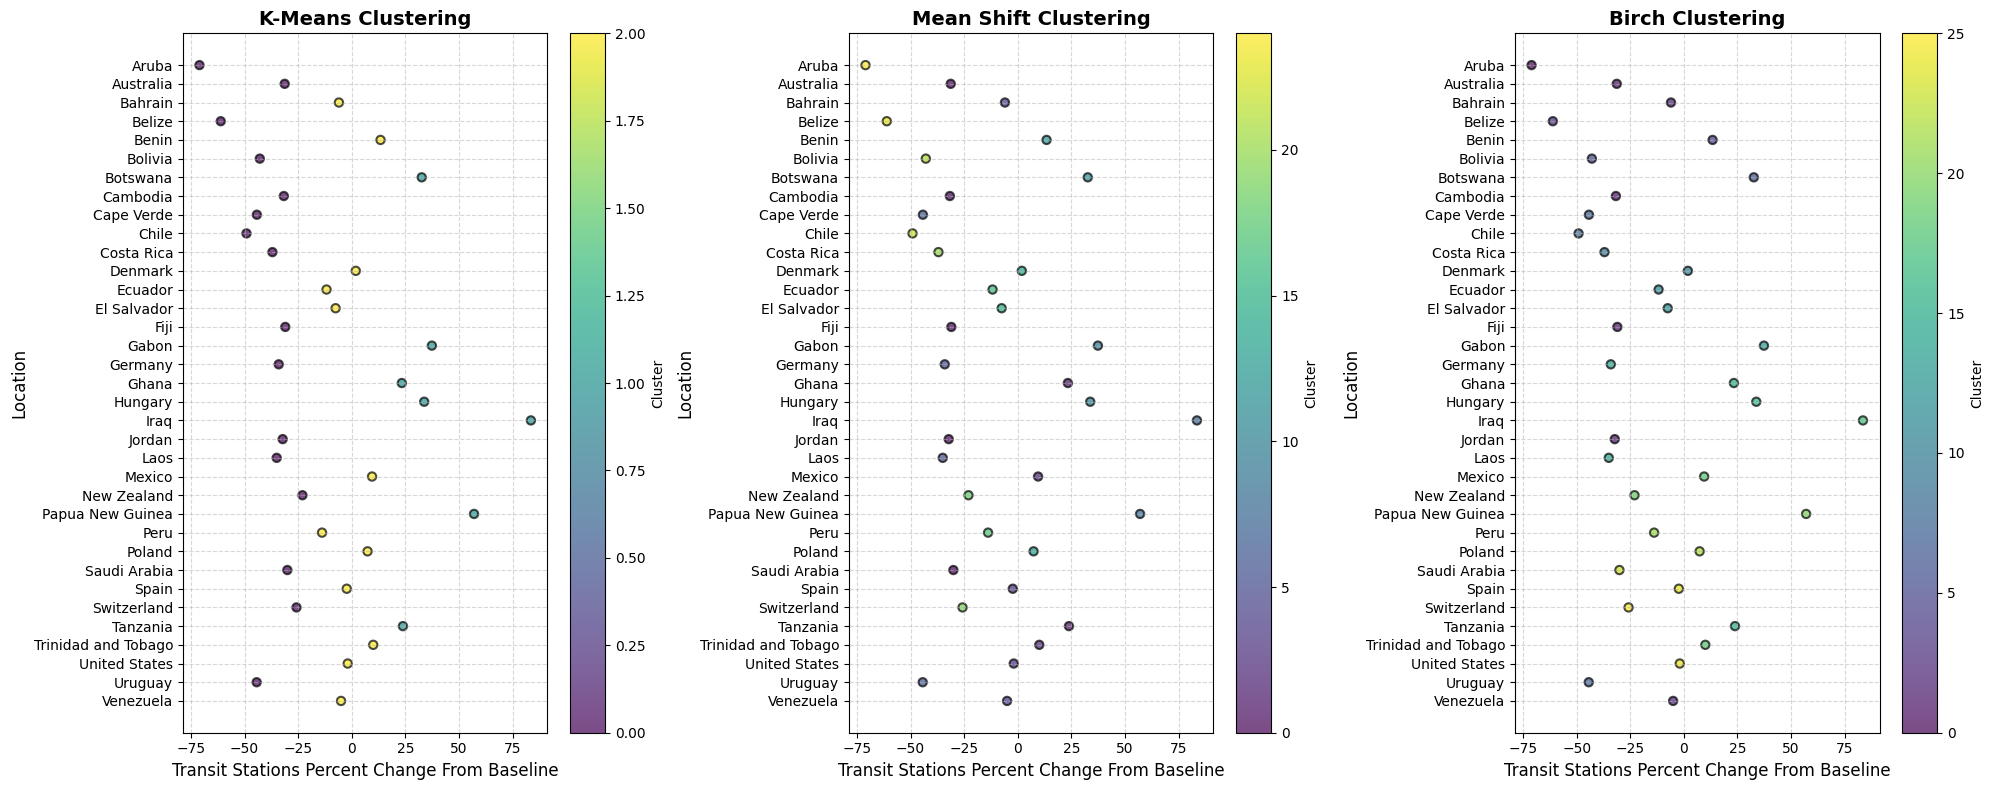

c:\Users\Shrey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


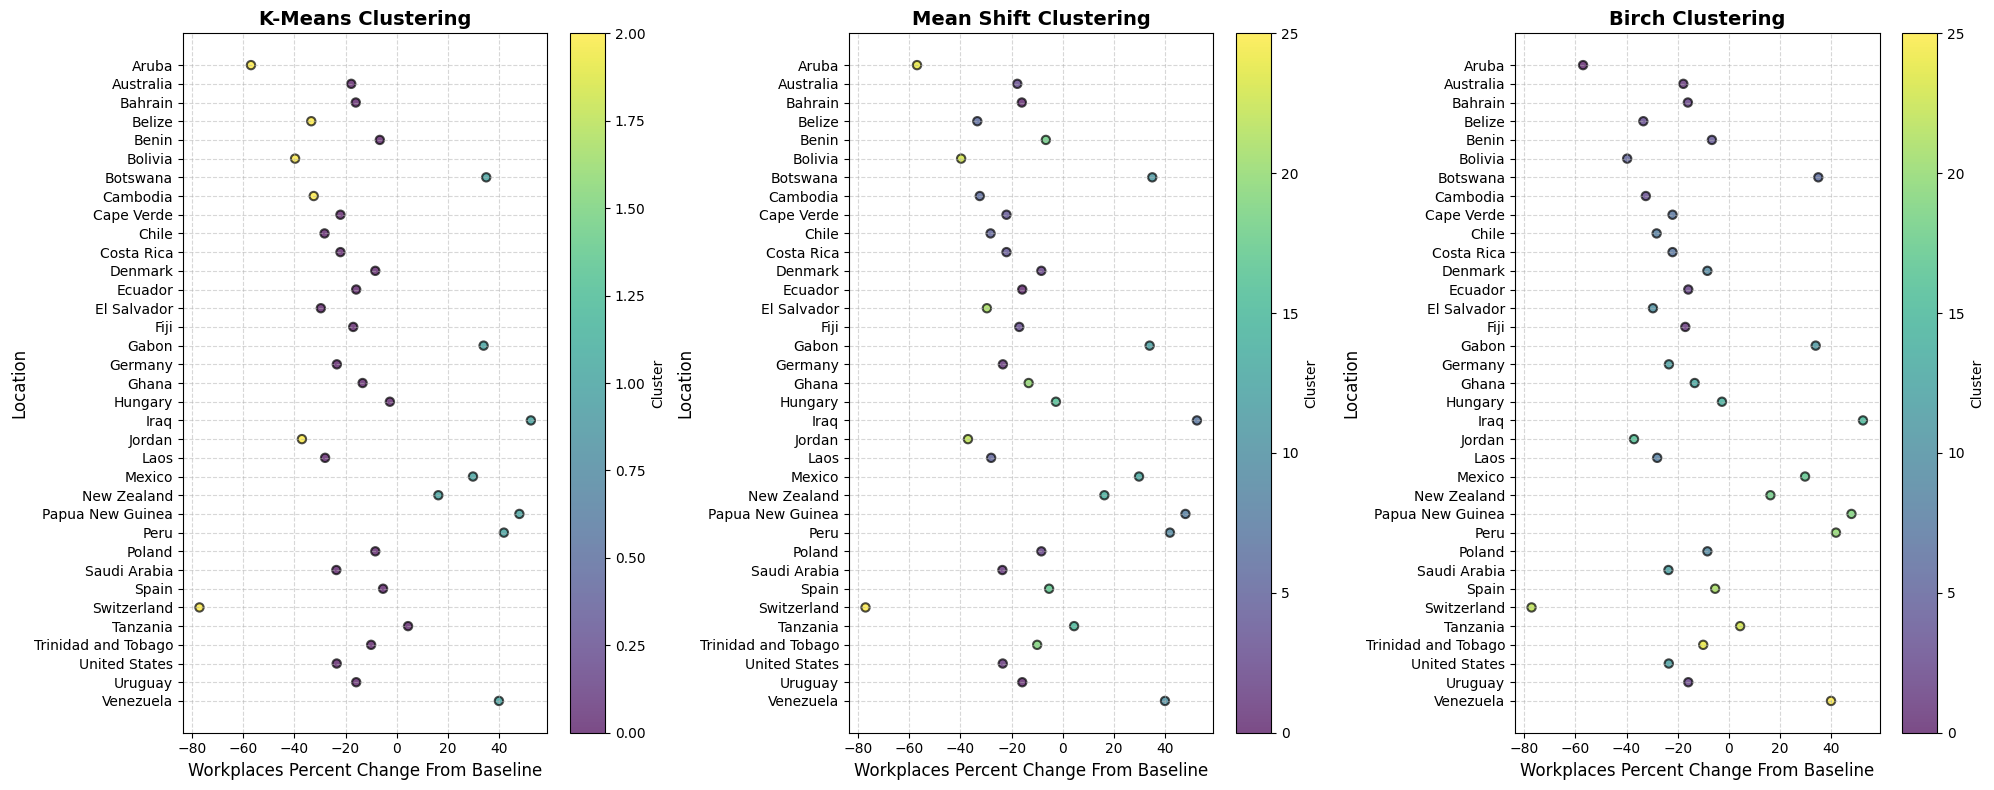

c:\Users\Shrey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


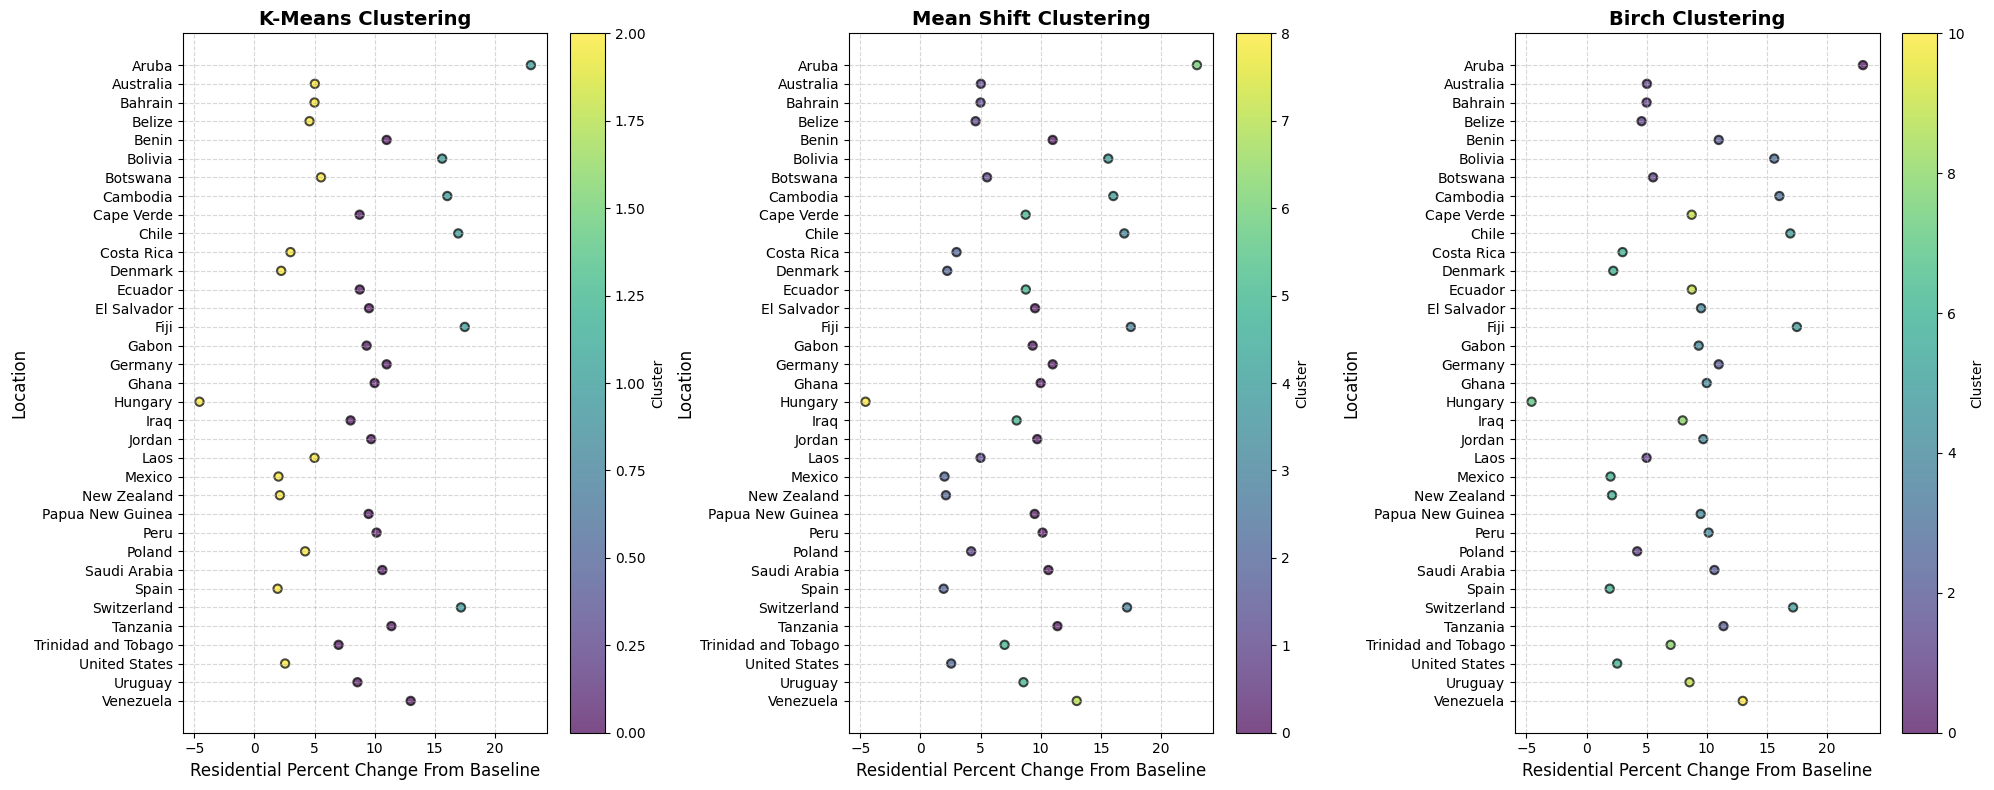

In [8]:
# List of columns to create scatter plots for
columns_to_plot = ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline',
                    'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']

# Create an empty DataFrame to store the selected countries
selected_countries = pd.DataFrame()

# Group the data by continent
grouped = data.groupby('continent')

# Loop through each column and create scatter plots
for column in columns_to_plot:
    # Select relevant columns
    selected_data = data[['location', 'continent', column]]

    # Randomly select 8 countries from each continent
    for name, group in grouped:
        if len(group) >= 8:
            random_sample = group.sample(n=8, random_state=42)  # Adjust random_state for reproducibility
            selected_countries = pd.concat([selected_countries, random_sample])

    # Aggregate data by location
    mean_data = selected_countries.groupby('location')[column].mean().reset_index()

    # Perform K-Means clustering
    k = 3  # Choose the optimal number of clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    mean_data['cluster'] = kmeans.fit_predict(mean_data[column].values.reshape(-1, 1))

    # Apply Mean Shift clustering on the same DataFrame
    bandwidth = 1  # Adjust the bandwidth parameter as needed
    mean_shift = MeanShift(bandwidth=bandwidth)
    mean_data['mean_shift_cluster'] = mean_shift.fit_predict(mean_data[column].values.reshape(-1, 1))

    # Apply Birch clustering on the same DataFrame
    birch = Birch(threshold=0.5, n_clusters=None)  # Adjust the threshold and n_clusters as needed
    mean_data['birch_cluster'] = birch.fit_predict(mean_data[column].values.reshape(-1, 1))

    # Create a single plot for all three clustering techniques
    plt.figure(figsize=(20, 8))


    # Plot K-Means clusters
    plt.subplot(131)  # 1 row, 3 columns, first subplot
    plt.scatter(mean_data[column], mean_data['location'], alpha=0.7, c=mean_data['cluster'], cmap='viridis', edgecolors='k', linewidths=1.5)
    plt.title(f'K-Means Clustering', fontsize=14, fontweight='bold')
    plt.xlabel(f'{column.replace("_", " ").title()}', fontsize=12)
    plt.ylabel('Location', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.gca().invert_yaxis()
    plt.grid(True, linestyle='--', alpha=0.5)
    cbar = plt.colorbar()
    cbar.set_label('Cluster', fontsize=10)

    # Plot Mean Shift clusters
    plt.subplot(132)  # 1 row, 3 columns, second subplot
    plt.scatter(mean_data[column], mean_data['location'], alpha=0.7, c=mean_data['mean_shift_cluster'], cmap='viridis', edgecolors='k', linewidths=1.5)
    plt.title(f'Mean Shift Clustering', fontsize=14, fontweight='bold')
    plt.xlabel(f'{column.replace("_", " ").title()}', fontsize=12)
    plt.ylabel('Location', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.gca().invert_yaxis()
    plt.grid(True, linestyle='--', alpha=0.5)
    cbar = plt.colorbar()
    cbar.set_label('Cluster', fontsize=10)

    # Plot Birch clusters
    plt.subplot(133)  # 1 row, 3 columns, third subplot
    plt.scatter(mean_data[column], mean_data['location'], alpha=0.7, c=mean_data['birch_cluster'], cmap='viridis', edgecolors='k', linewidths=1.5)
    plt.title(f'Birch Clustering', fontsize=14, fontweight='bold')
    plt.xlabel(f'{column.replace("_", " ").title()}', fontsize=12)
    plt.ylabel('Location', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.gca().invert_yaxis()
    plt.grid(True, linestyle='--', alpha=0.5)
    cbar = plt.colorbar()
    cbar.set_label('Cluster', fontsize=10)

    plt.tight_layout()
    plt.show()